# Non-convex inverse problems project: Sparse PCA
##### Yago Aguado, M2 MASH

In [176]:
#Modules
import numpy as np
from random import sample
import cvxpy as cp
import matplotlib.pyplot as plt 
import itertools


#### Question 1

In [ ]:
# Question 1: code a function generating an instance of the problem

def simulation(k, m, n):
    # Sample the lists of non-zero indices
    l = range(n) #indices are those in python
    s1 = sample(l, k)
    s2 = sample(l, k)
    
    # Create the vectors forming x
    u = np.zeros(n)
    v = np.zeros(n)
    
    u[s1] = np.random.random(k)
    v[s2] = np.random.random(k)
    # Compute x
    X = np.outer(u, v)
    
    # Generate the random matrices A_i
    lA = []
    ly = []
    for i in range(m):
        A = np.random.uniform(0, 1, (n,n))
        y = np.trace(A.T @ X) #Frobenius product
        lA.append(A)
        ly.append(y)
    
    return X, s1, s2, lA, ly
        
    

#### Question 3

In [ ]:
# Question 3: let us implement a solver for the convex approach

def solver(lbda, lA, ly, n, m):
    # Define the problem
    X = cp.Variable((n, n))
    constraints =[cp.trace(lA[k].T @ X) == ly[k] for k in range(m)]
    objective = cp.Minimize(cp.norm(X,"nuc") + lbda * cp.norm(X, p = 1))
    problem = cp.Problem(objective,constraints)

    # Solve it
    problem.solve(solver=cp.SCS,verbose=False)
    return X.value

def error(X, s1, s2, z):
    n = np.shape(X)[0]
    min = np.abs(X[s1[0], s2[0]])
    for i in s1:
        for j in s2:
            if np.abs(X[i, j])< min:
                min = np.abs(X[i, j])
    
    err = 0
    for i in range(n):
        for j in range(n):
            if i in s1 and j in s2:
                if z[i, j] < min/10:
                    err += 1
            else:
                if z[i, j] > min/10:
                    err += 1
    
    return err

In [114]:
# Testing the code
lbda = 0.1

for i in range(2,25):
    X, s1, s2, lA, ly = simulation(2, i, 4)
    Z = solver(lbda, lA, ly, 4, i)
    print(error(X, s1, s2, Z))


8
0
5
10
7
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0


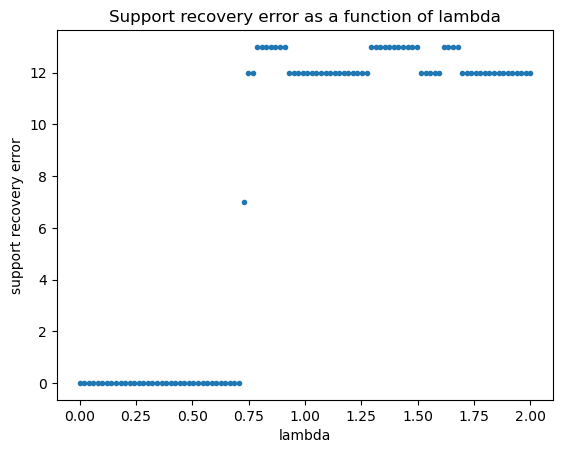

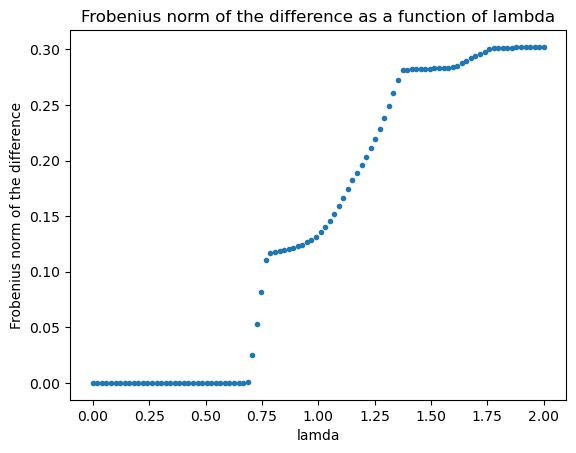

In [175]:
# Plots for the recovery error as a function of lambda
k = 3
m = 20
n = 6

errors = []
norms = []
X, s1, s2, lA, ly = simulation(k, m, n)
lmbdas = np.linspace(0, 2, 100)
for lbda in lmbdas:
    Z = solver(lbda, lA, ly, n, m)
    errors.append(error(X, s1, s2, Z))
    norms.append(np.linalg.norm(X-Z, 'fro'))

plt.plot(lmbdas, errors, ".")
plt.xlabel("lambda")
plt.ylabel("support recovery error")
plt.title("Support recovery error as a function of lambda")
plt.show()

plt.plot(lmbdas, norms, ".")
plt.xlabel("lamda")
plt.ylabel("Frobenius norm of the difference")
plt.title("Frobenius norm of the difference as a function of lambda")
plt.show()
    

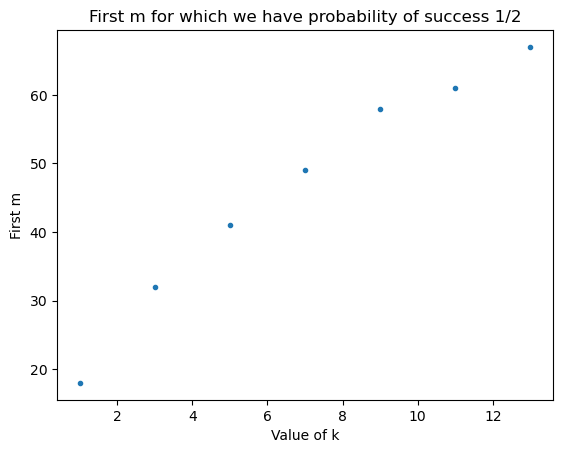

In [124]:
n = 20
lbda = 0.2
listm = []
for k in range(1, 14, 2):
    stopCond = True
    m = 0
    while stopCond and m<400:
        ct = 0
        for i in range(20):
            X, s1, s2, lA, ly = simulation(k, m, n)
            Z = solver(lbda, lA, ly, n, m)
            if error(X, s1, s2, Z) == 0:
                ct +=1
        if ct >=10:
            stopCond = False
            listm.append(m)
        m+=1

ks = range(1, 14, 2)
plt.plot(ks, listm, ".")
plt.title("First m for which we have probability of success 1/2")
plt.xlabel("Value of k")
plt.ylabel("First m")
plt.show()

In [125]:
#Define a solving function for objective F2
def alt_solver(lA, ly, n, m):
    # Define the problem
    X = cp.Variable((n, n))
    constraints =[cp.trace(lA[k].T @ X) == ly[k] for k in range(m)]
    objective = cp.Minimize(cp.pnorm(X, p = 1))
    problem = cp.Problem(objective,constraints)

    # Solve it
    problem.solve(solver=cp.SCS,verbose=False)
    return X.value

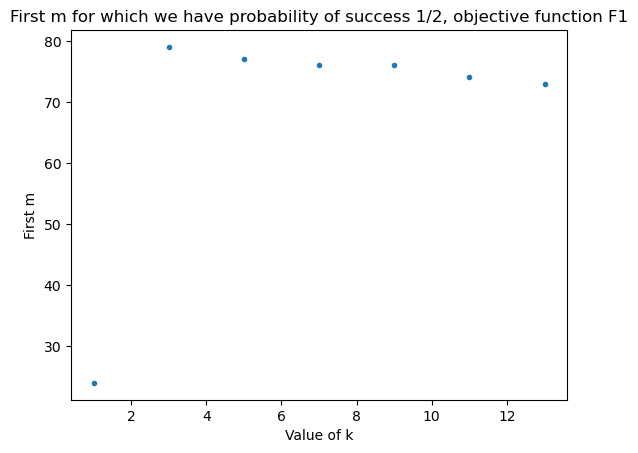

In [126]:
# Simulation for only F1
n = 20
lbda = 0
listm = []
for k in range(1, 14, 2):
    stopCond = True
    m = 0
    while stopCond and m<400:
        ct = 0
        for i in range(20):
            X, s1, s2, lA, ly = simulation(k, m, n)
            Z = solver(lbda, lA, ly, n, m)
            if error(X, s1, s2, Z) == 0:
                ct +=1
        if ct >=10:
            stopCond = False
            listm.append(m)
        m+=1

ks = range(1, 14, 2)
plt.plot(ks, listm, ".")
plt.title("First m for which we have probability of success 1/2, objective function F1")
plt.xlabel("Value of k")
plt.ylabel("First m")
plt.show()

c:\Users\yagoa\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


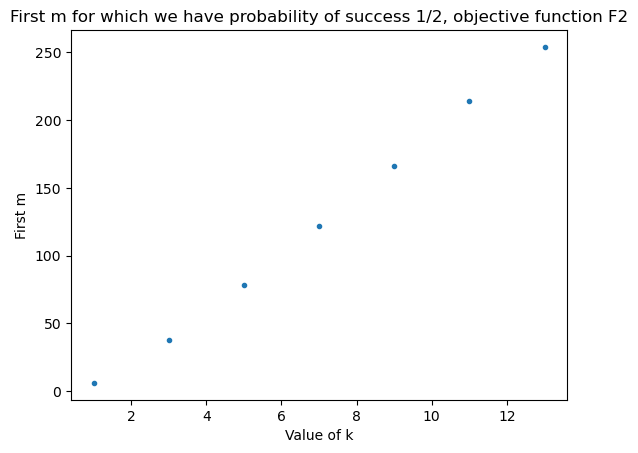

In [129]:
# Simulation for only F2
n = 20
listm = []
for k in range(1, 14, 2):
    stopCond = True
    m = 0
    while stopCond and m<400:
        ct = 0
        for i in range(20):
            X, s1, s2, lA, ly = simulation(k, m, n)
            Z = alt_solver(lA, ly, n, m)
            if error(X, s1, s2, Z) == 0:
                ct +=1
        if ct >=10:
            stopCond = False
            listm.append(m)
        m+=1

ks = range(1, 14, 2)
plt.plot(ks, listm, ".")
plt.title("First m for which we have probability of success 1/2, objective function F2")
plt.xlabel("Value of k")
plt.ylabel("First m")
plt.show()

#### Question 4

In [184]:
# Recover S1, S2 from Z

# The function is far from optimal, but it fulfils its purpose
# Candidate 1
def find_indices(Z, k):
    n = Z.shape[0]
    s1 = []
    s2 = []
    non_zero_vals= []
    for i in range(n):
        for j in range(n):
            if abs(Z[i, j]) > 0.01:
                non_zero_vals.append(abs(Z[i, j]))

    non_zero_vals.sort(reverse = True)
    max_vals = non_zero_vals[:k*k]
    
    for i in range(n):
        for j in range(n):
            if abs(Z[i, j]) in max_vals:
                s1.append(i)
                s2.append(j)
    s1 = list(set(s1)) #remove duplicates
    s2 = list(set(s2))
    print(s1, s2)
    return s1, s2

# Candidate 2, better
def approximate_supports(Z, k):
    n = Z.shape[0]
    row_norms = np.sum(np.abs(Z), axis=1)
    col_norms = np.sum(np.abs(Z), axis=0)
    
    # Create all possible combinations of k rows and k columns
    row_indices = np.argsort(row_norms)[-k:]
    col_indices = np.argsort(col_norms)[-k:]
    
    # Combination with the highest sum
    best_sum = -np.inf
    best_S1, best_S2 = None, None
    
    for S1 in itertools.combinations(row_indices, k):
        for S2 in itertools.combinations(col_indices, k):
            current_sum = np.sum(np.abs(Z[np.ix_(S1, S2)]))
            if current_sum > best_sum:
                best_sum = current_sum
                best_S1, best_S2 = S1, S2
    
    print(list(best_S1), list(best_S2))
    return list(best_S1), list(best_S2)

# Recover X from S1 and S2
def recover_from_guess(Z, s1, s2):
    Z_rest = np.zeros((k,k))
    for i in range(len(s1)):
        for j in range(len(s2)):
            Z_rest[i, j] = Z[s1[i], s2[j]]
    U, S, V = np.linalg.svd(Z_rest)
    U = U[:, 0]*np.sqrt(S[0])
    V = V[:, 0]*np.sqrt(S[0])
    
    
    u = np.zeros(n)
    v = np.zeros(n)
    for i in range(len(s1)):
        u[s1[i]] = U[i]
        v[s2[i]] = V[i]
        
    return u, v

def noncv_solver(lA, ly, n, m, k):
    Z = np.zeros((n,n))
    for i in range(n):
        Z += ly[i]*lA[i]
    Z = Z/m
    
    s1, s2 = approximate_supports(Z, k)
    u, v = recover_from_guess(Z, s1, s2)
    
    return u, v, s1, s2 

In [186]:
# Now we test this algorithm

def is_basis_right(s1, s2, c1, c2):
    return s1 == c1 and s2 == c2

n = 10
k = 4
correct_basis = 0
incorrect_basis = 0
errors = []
norms = []


for l in range(10):
    for m in range(10, 120, 10):
        X, s1, s2, lA, ly = simulation(k, m, n)
        u, v, c1, c2 = noncv_solver(lA, ly, n, m, k)
        Z = np.outer(u, v)
        errors.append(error(X, s1, s2, Z))
        norms.append(np.linalg.norm(X-np.outer(u, v), 'fro'))
        if is_basis_right(s1, s2, c1, c2):
            correct_basis +=1
        else:
            incorrect_basis += 1 

[1, 7, 8, 5] [4, 5, 6, 0]
[0, 6, 5, 3] [2, 4, 0, 3]
[1, 7, 4, 8] [0, 7, 6, 3]
[6, 4, 9, 3] [0, 6, 4, 5]
[7, 6, 8, 4] [9, 1, 2, 6]
[9, 0, 2, 7] [7, 5, 2, 1]
[6, 4, 1, 3] [7, 2, 6, 3]
[1, 9, 8, 4] [5, 4, 9, 8]
[4, 3, 1, 8] [7, 3, 5, 8]
[8, 5, 4, 9] [1, 2, 5, 9]
[2, 7, 4, 5] [3, 9, 8, 7]
[5, 2, 9, 0] [6, 2, 1, 4]
[2, 1, 5, 7] [5, 1, 0, 6]
[4, 1, 7, 0] [9, 8, 6, 4]
[5, 1, 8, 3] [4, 2, 8, 1]
[7, 3, 6, 2] [5, 4, 1, 9]
[7, 5, 1, 2] [4, 5, 3, 8]
[7, 8, 1, 6] [8, 6, 9, 2]
[5, 8, 6, 4] [9, 3, 6, 0]
[0, 1, 4, 8] [6, 7, 1, 3]
[7, 6, 9, 8] [6, 7, 2, 0]
[5, 4, 9, 8] [8, 9, 7, 5]
[2, 6, 8, 3] [7, 2, 6, 8]
[2, 7, 8, 6] [7, 5, 8, 0]
[0, 8, 3, 6] [5, 2, 4, 6]
[2, 8, 1, 9] [5, 0, 9, 1]
[9, 0, 5, 6] [7, 9, 6, 1]
[4, 1, 3, 8] [8, 5, 9, 2]
[9, 1, 6, 8] [6, 7, 9, 8]
[7, 6, 1, 3] [9, 1, 6, 3]
[7, 8, 4, 5] [3, 9, 7, 8]
[7, 3, 8, 0] [5, 1, 4, 9]
[4, 1, 3, 0] [8, 3, 5, 4]
[6, 8, 7, 1] [9, 7, 5, 6]
[5, 7, 8, 9] [2, 3, 0, 8]
[0, 2, 3, 4] [2, 4, 7, 8]
[8, 5, 9, 3] [3, 1, 4, 6]
[4, 3, 5, 8] [5, 9, 8, 7]
[5, 1, 4, 2]

In [183]:
print(norms)
print(errors)
print(correct_basis)

[6.991896231482443, 1.1276528801058041, 2.825546977514118, 1.7460060036165874, 1.2315990869736375, 1.8469900920066005, 1.2546024413251808, 0.7856652622996911, 1.5637086955391803, 2.037880082903627, 2.1214815924431636, 4.0783455661033265, 3.028514188226008, 2.0380439365879766, 1.7424707031046747, 1.6991251601755153, 1.1267324437043933, 2.2103577483030024, 1.0940107821988507, 0.44435336419859023, 1.29477040302108, 0.7553023944821058, 8.916671180067567, 4.262538371269279, 2.0450895255429633, 1.9199510558142316, 1.094184047933326, 0.979192891346717, 0.8983733578984172, 0.7349795878579479, 2.3259533676250346, 1.3484843491293703, 1.846685245284613, 9.222518974487375, 1.1543936926165415, 2.9375130546812147, 1.977698872119805, 0.9826619348776274, 1.7133399172874435, 1.5753556313974804, 1.5209682409100769, 0.8570406488852635, 0.6635954158873587, 0.7642411343884002, 2.7150556218333866, 1.391319272431677, 2.0249450428453746, 1.8213257870171802, 2.9167321246979006, 1.293135434833868, 0.60007780654

In [ ]:
# Improved algorithm
def least_squares_it(lA, ly, s1, s2, u, v):
    m = len(lA)
    k = len(s1)
    
    # Fix v and solve for u
    M = np.zeros((m, k))
    for i in range(m):
        M[i, :] = [np.sum(lA[i][j, s2] * v[s2]) for j in s1]
    
    # Solve least squares for u[S1]
    u_S1, _, _, _ = np.linalg.lstsq(M, ly, rcond=None)
    
    # Fix u and solve for v
    N = np.zeros((m, k))
    for i in range(m):
        N[i, :] = [np.sum(lA[i][s1, j] * u_S1) for j in S2]
    
    # Solve least squares for v[S2]
    v_S2, _, _, _ = np.linalg.lstsq(N, ly, rcond=None)
    
    return u_S1, v_S2
def improved_solver(lA, ly, n, m, k):
    Z = np.zeros((n,n))
    for i in range(n):
        Z += ly[i]*lA[i]
    Z = Z/m
    
    s1, s2 = approximate_supports(Z, k)
    u, v = recover_from_guess(Z, s1, s2)
    for i in range(100):
        u, v = least_squares_it(lA, ly, s1, s2, u, v)
    
    return u, v, s1, s2